# Clustering the Utility Matrix

We begin loading the helper script before applying a kmeans on the normalised 

In [3]:
import os, sys
%load_ext autoreload
%autoreload 2

src = '/Users/richardlastrucci/Library/Mobile Documents/com~apple~CloudDocs/University/Honours/Semester 2/COS 781/project/src'
sys.path.append(src)
import helper as h

In [1]:
import pandas as pd, numpy as np

path = '/Users/richardlastrucci/Library/Mobile Documents/com~apple~CloudDocs/University/Honours/Semester 2/COS 781/project/data/preprocessed'
df = pd.read_json(f'{path}/reviews_sample_cleaned.json')


In [2]:
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler


rows = df['user_id'].astype('category').cat.codes
cols = df['book_id'].astype('category').cat.codes
values = df['rating']

sparse_matrix = csr_matrix((values, (rows, cols)))

scaler = MinMaxScaler()
normalized_matrix = scaler.fit_transform(sparse_matrix.toarray().T).T

### Determine the number of clusters

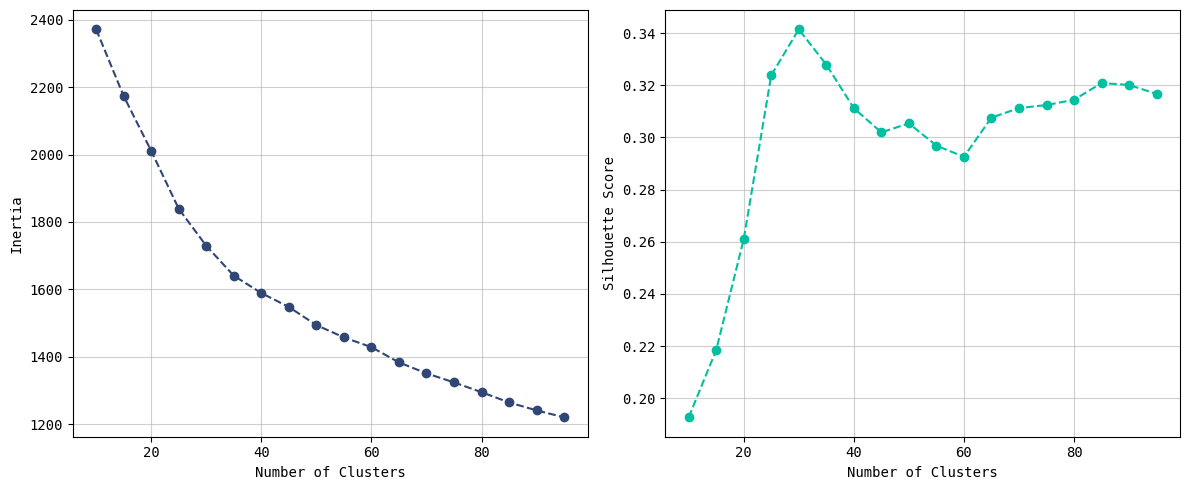

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
cluster_range = range(10, 100,5)

for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(normalized_matrix)
    inertia.append(kmeans.inertia_)
    
    labels = kmeans.labels_
    score = silhouette_score(sparse_matrix, labels,metric='cosine')
    silhouette_scores.append(score)

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(cluster_range, inertia, marker='o', linestyle='--', color=h.deep)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(alpha=0.6)

plt.subplot(1, 2, 2)
plt.plot(cluster_range, silhouette_scores, marker='o', linestyle='--', color=h.turq)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(alpha=0.6)

plt.tight_layout()
plt.show()


### How many items per cluster 

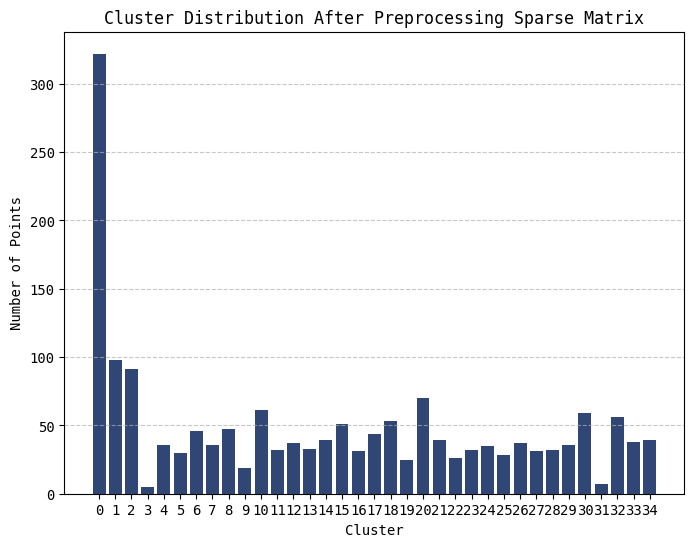

In [7]:
n_clusters=35
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(sparse_matrix)
labels = kmeans.labels_

unique_labels, counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(8, 6))
plt.bar(unique_labels, counts, color=h.deep, tick_label=[i for i in unique_labels])
plt.title("Cluster Distribution After Preprocessing Sparse Matrix")
plt.xlabel("Cluster")
plt.ylabel("Number of Points")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
from matplotlib.colors import LinearSegmentedColormap

colors = [h.deep,h.sea,h.turq,h.yellow] 
cmap = LinearSegmentedColormap.from_list("custom_cmap", colors) # custom cmap

### PCA 3d Visualisation

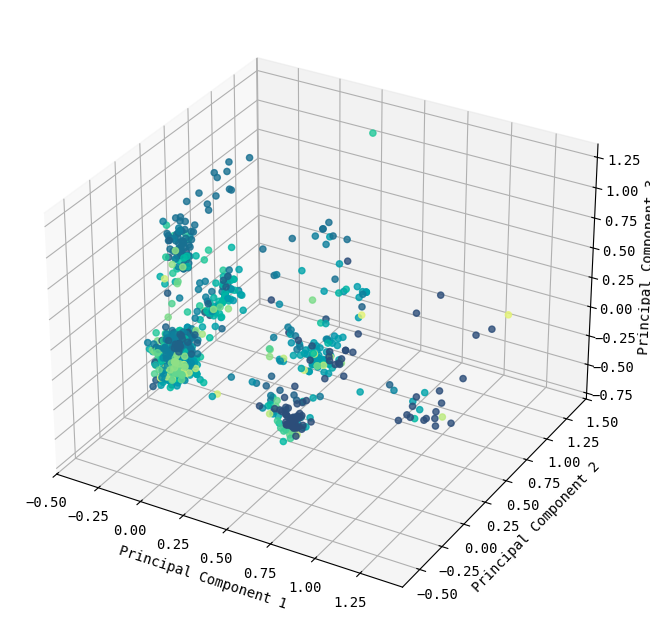

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

n_clusters = 35


kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(normalized_matrix)
labels = kmeans.labels_

pca = PCA(n_components=3, random_state=42)
pca_result = pca.fit_transform(normalized_matrix)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in range(n_clusters):
    cluster_points = pca_result[labels == cluster_label]
    ax.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        cluster_points[:, 2],
        color=cmap(cluster_label / n_clusters), 
        label=f"Cluster {cluster_label}",
        s=20,
        alpha=0.8
    )

ax.set_xlabel("Principal Component 1")
ax.set_ylabel("Principal Component 2")
ax.set_zlabel("Principal Component 3")

plt.show()


### t-SNE 2d Visualisation

/opt/homebrew/Caskroom/miniforge/base/envs/cos781/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


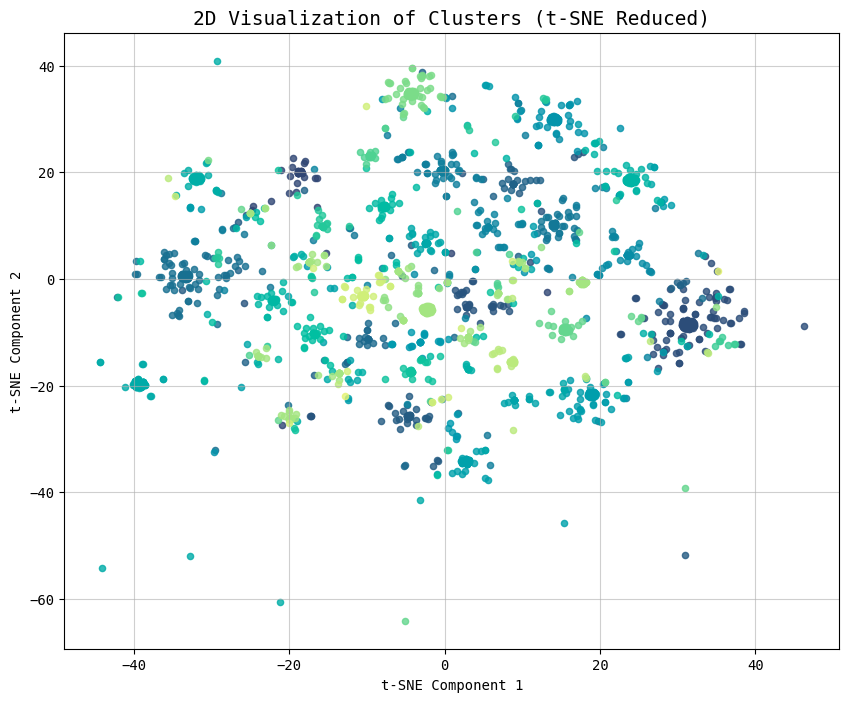

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

n_clusters = 35


kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(normalized_matrix)
labels = kmeans.labels_

tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
tsne_result = tsne.fit_transform(normalized_matrix)  # Convert sparse matrix to dense if necessary

# Plot clusters in 2D/
plt.figure(figsize=(10, 8))
for cluster_label in range(n_clusters):
    cluster_points = tsne_result[labels == cluster_label]
    plt.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        color=cmap(cluster_label / n_clusters), 
        label=f"Cluster {cluster_label}",
        s=20,
        alpha=0.8
    )

# Add labels and legend
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.grid(alpha=0.6)
plt.show()


### t-SNE 3d Visualisation

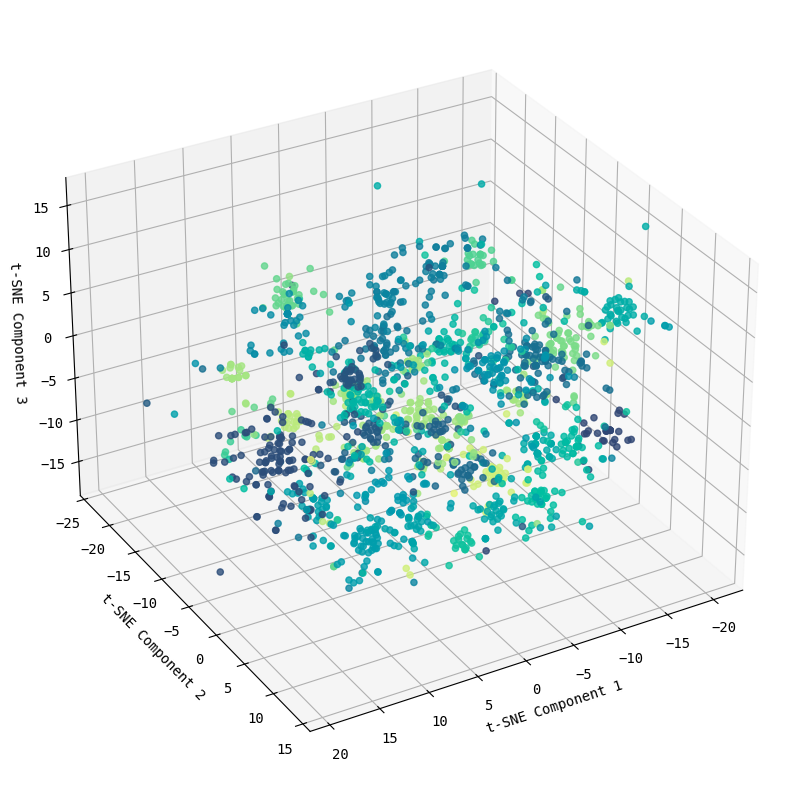

In [20]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from matplotlib import cm

n_clusters = 35
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(normalized_matrix)
labels = kmeans.labels_

tsne = TSNE(n_components=3, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(normalized_matrix)

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

for cluster_label in range(n_clusters):
    cluster_points = tsne_result[labels == cluster_label]
    ax.scatter(
        cluster_points[:, 0],
        cluster_points[:, 1],
        cluster_points[:, 2],
        color=cmap(cluster_label / n_clusters), 
        s=20,
        alpha=0.8
    )

ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_zlabel("t-SNE Component 3")

ax.set_xlim([tsne_result[:, 0].min(), tsne_result[:, 0].max()])
ax.set_ylim([tsne_result[:, 1].min(), tsne_result[:, 1].max()])
ax.set_zlim([tsne_result[:, 2].min(), tsne_result[:, 2].max()])

ax.view_init(elev=30, azim=60)

plt.show()
